# Reverse Feature Elimination

It's very common to have data that has many features, some might be useful in predicting what you want and many might not be useful. How can you tell if you should or should not use a feature in a model? 

The `sci-kit` libary offers a technique called Reverse Feature Elimination (RFE), where it automatically runs many models and finds the combination of features that produce a "parsimonous" model: one that is accurate and simple.

Below, we use generated data to perform RFE. You are then asked to find a real data set on which perform a regression analysis. That work uses all the elements of what we have done so far.

In [1]:
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Generate regression dataset with 10 variables
X, y = make_regression(n_samples=1000, n_features=20, n_informative=3, noise=10)

# Convert the data set to a Pandas dataframe
df = pd.DataFrame(X)
df['response'] = y

## Calling RFE

Below we are perform the RFE. You can see that the structure is really similar to what we've done with other modeling tools. The new thing is `n_features_to_select`, which can be set to a given value (like 4 or 10) or like below, we can iterate through all possible values to see the effects.

We store all the important values in lists and use those for plotting.

In [3]:
# Create linear regression object
lr = LinearRegression()

# Define max number of features
max_features = 20

# Define empty arrays to store R2 and MSE values
r2_scores = []
mse_values = []
n_features = range(1, max_features+1)

# Perform RFE and compute R2 and MSE for each number of features
for n in n_features:
    # Define RFE with n variables to select
    rfe = RFE(lr, n_features_to_select=n)

    # Fit RFE
    rfe.fit(X, y)

    # Compute y_pred values
    y_pred = rfe.predict(X)

    # Compute R2 score and MSE
    r2_scores.append(r2_score(y, y_pred))
    mse_values.append(mean_squared_error(y, y_pred))

## Looking at the models

Below, we are plotting the quality of the fits compared to the number of features in the model.

**Can you figure out which combination of features are being used in these models?**

*Focus on one choice of model to do this. Maybe the best accuracy, but fewest features.*

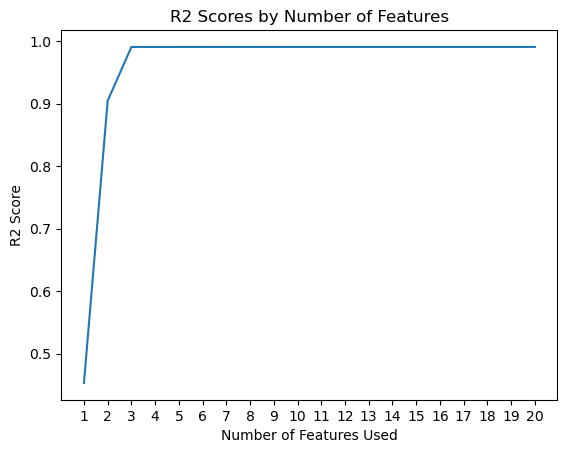

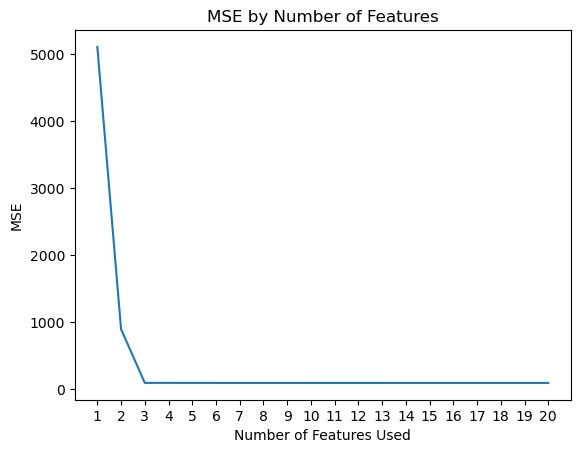

In [4]:
# Plot R2 scores versus number of features used
plt.plot(n_features, r2_scores)
plt.title('R2 Scores by Number of Features')
plt.xlabel('Number of Features Used')
plt.xticks(np.arange(1, max_features+1, 1))
plt.ylabel('R2 Score')
plt.show()

# Plot MSE values versus number of features used
plt.plot(n_features, mse_values)
plt.title('MSE by Number of Features')
plt.xlabel('Number of Features Used')
plt.xticks(np.arange(1, max_features+1, 1))
plt.ylabel('MSE')
plt.show()

## Things to try
* Try to determine which features are being used in the "best model". You can also look into `sci-kit` best estimators tools, which can automatically return all this.
* Try writing a code for a different `sci-kit` regressor and see how it works.
* Finally, search for a data set that you can use to perform a regression analysis. You can start that work today.